In [ ]:
from collections import defaultdict
import pandas as pd
import pyrsm as rsm
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from matplotlib import cm
import seaborn as sns

In [ ]:
%pip install google-api-python-client

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# importing functions from the package

from utils import functions_yt as yt
from utils import config

## DATA EXTRACTION

In [ ]:
# Setting up the API:

# API client library
import googleapiclient.discovery
# API information
api_service_name = "youtube"
api_version = "v3"
# API key
DEVELOPER_KEY = config.key1
# API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey = DEVELOPER_KEY)

In [ ]:
seeds = ['UCuo0mGEjPt4BZUSUlfy6wqg',
            'UC3QThbmDmhKNgiBnwhc7RJQ',
            'UCvqTF21QbPGOWGiu5BvgQug',
            'UC_ZbHl7lZxuwEYD1lfo-dAw',
            'UCCrCer5_xguF5tGk3AdQCXg',
            'UCZV2EOESfOdW_LqNp6NQaEA',
            'UCyM4-l72h4cxkt5bn3BTpFw',
            'UCc9aUBt45BNRVF7UCN9_jtQ',
            'UC-G0WxYDdRtu0Fn2r2xmmcA', 
            'UCFIaOXW24_LPaZXCwvGwOMA']

In [ ]:
# Extracting channel information (1st layer)

df_channels = yt.get_channel_info(seeds, youtube)
df_channels.head()

,ch_id,ch_title,ch_description,ch_created,ch_country,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UC_ZbHl7lZxuwEYD1lfo-dAw,Vinox rai,IN THIS CHANNEL I WILL UPLOAD VIDEOS OF GAMING...,2022-01-19T15:05:39.073159Z,None,2479407,12100,27
1,UCvqTF21QbPGOWGiu5BvgQug,GAMER I db,Hello friends welcome to my YouTube channel 😊😊...,2016-10-28T03:01:29Z,None,2732126,9900,40
2,UCZV2EOESfOdW_LqNp6NQaEA,MatrixGuy,I like making videos\nThanks for reading :)\n\...,2019-02-13T12:46:50Z,None,2484937,9980,33
3,UCyM4-l72h4cxkt5bn3BTpFw,Tech Mantra,The world of technology is changing rapidly. W...,2017-11-06T20:08:27Z,None,1061790,10000,41
4,UCuo0mGEjPt4BZUSUlfy6wqg,AKUU,Subscribe Karo Or Maja Luto.......\n\nHey guys...,2022-04-30T18:44:07.471156Z,None,187683,9960,12


In [ ]:
# Extracting videos information (1st layer)

df_videos = yt.get_videos_info(seeds, youtube)
df_videos.head()

Total number of channels: 10
Total number of videos: 77


c:\Users\Svea\.vscode\E-Sport-scapper\utils\functions_yt.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_videos['vid_viewCount'].fillna(0, inplace=True)
c:\Users\Svea\.vscode\E-Sport-scapper\utils\functions_yt.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,vid_id,ch_id,vid_title,vid_description,vid_published,vid_viewCount,vid_likeCount,vid_commentCount
0,5dRZ7P82hx4,UC3QThbmDmhKNgiBnwhc7RJQ,Phasmo Horror Game PLAy live STEARM,#phasmophobia \n#phasmophobiagame \n#horrorgam...,2023-09-25T02:07:30Z,89,9,1
1,yjjRLXaeyEo,UC_ZbHl7lZxuwEYD1lfo-dAw,RAISTAR KALAHARI KING ☠️| FULL MAP KING IS BAC...,RAISTAR KALAHARI KING ☠️| FULL MAP KING IS BAC...,2024-11-17T06:55:16Z,3716,0,4
2,pzD09wnL8i0,UC3QThbmDmhKNgiBnwhc7RJQ,First fastest iron farm in mine craft PE . 100...,#mine_craft_pc #mine_craft #iron_farm #hacker...,2023-04-07T13:58:43Z,76,17,0
3,XfTY2D8KKUw,UC3QThbmDmhKNgiBnwhc7RJQ,Unlimited Gold and XP farm for minecraft PE ...,#minecraft gold and ex farm minecraft 1.19\n# ...,2023-04-17T16:26:38Z,220,20,3
4,fwvm2QR9hd4,UC-G0WxYDdRtu0Fn2r2xmmcA,coc best loot ever 43+ lakh elixer loot | new ...,,2024-11-08T17:56:17Z,89,2,0


In [ ]:
print(f"1st layer comment count: {df_videos['vid_commentCount'].sum():,.0f}")

1st layer comment count: 1,093


In [ ]:
video_ids = list(set(df_videos['vid_id'])) # Makes sure there are no duplicates

In [10]:
# Extracting commenters information (1st layer)

df_commenters = yt.get_commenters_info(video_ids, youtube)
df_commenters.head()

,vid_id,commenter_id,comment_id
0,5dRZ7P82hx4,UCKHoIJrOkO1rV1SsDlKZMeg,UgxWnE5EhwxIpgqHWFN4AaABAg
311,yjjRLXaeyEo,UCOY5H_-zmHaNajjrOKNIzfw,UgwKKGvbBPjs-_UfOWZ4AaABAg
312,yjjRLXaeyEo,UCX_efAvyRN2Ordi_hWw9GpQ,UgwVDIDGuUo_-M56SNl4AaABAg
313,yjjRLXaeyEo,UCqrUZmPdZF66bQ6fsuMrp4g,UgyFoGZTD1CyCqo_sCp4AaABAg
314,yjjRLXaeyEo,UCqrUZmPdZF66bQ6fsuMrp4g,UgyANGrJkcNjMIaA_Zx4AaABAg


In [11]:
df_commenters.shape

(901, 3)

In [12]:
# Unique number of commenters
commenters = list(set(df_commenters['commenter_id']))
len(commenters)

765

In [13]:
# Extracting channel information (2nd layer)

df_channels2 = yt.get_channel_info(commenters, youtube)
df_channels2.head()

,ch_id,ch_title,ch_description,ch_created,ch_country,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UCo_kePF5TUL3q12BNeP8mbA,Amrita Barman,,2024-06-04T15:22:11.985382Z,None,29,2,1
1,UCX-5HUJlGjY6LdRzYliU_gA,Theft,Welcome to our captivating world of long video...,2023-06-19T12:47:15.561716Z,None,3,4,1
2,UCIeZPusYW8xlUxhcAwgBwzA,Nomaan FF,O N L Y G A M E R 💀\n,2022-09-19T15:19:12.442724Z,None,0,158,0
3,UC-qmqDD6441XUaSt4O6bMCg,Khushbu sadik khan,Khushbu sadik,2022-07-28T10:46:48.363899Z,None,36,2,1
4,UCmSUuuRVd9Kc1A0gLTfc-zA,SMART JITU,Mukesh Bag\n,2020-07-07T10:02:40.631576Z,None,9,36,1


In [14]:
# Now we'll filter out those channels that are less relevant (no videos/ low subscriber count):

min_videos = 10 # These parameters are arbitrary
min_subs = 1000

channels2 = df_channels2[(~df_channels2['ch_id'].isin(seeds)) & (df_channels2['ch_viewCount'] > min_videos) & (df_channels2['ch_subscriberCount'] > min_subs)]
channels2.shape

(36, 8)

In [15]:
# Extracting videos information (2nd layer)

channels2_list = list(channels2['ch_id'])
df_videos2 = yt.get_videos_info(channels2_list, youtube)
df_videos2.shape

Total number of channels: 36
Total number of videos: 1484


c:\Users\Svea\.vscode\E-Sport-scapper\utils\functions_yt.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_videos['vid_viewCount'].fillna(0, inplace=True)
c:\Users\Svea\.vscode\E-Sport-scapper\utils\functions_yt.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

(1484, 8)

In [16]:
print(f"2nd layer comment count: {df_videos2['vid_commentCount'].sum():,.0f}")

2nd layer comment count: 7,365


In [17]:
video_ids2 = list(set(df_videos2['vid_id'])) # Makes sure there are no duplicates
len(video_ids2)

1484

In [18]:
# Extracting commenters information (2nd layer)

df_commenters2 = yt.get_commenters_info(video_ids2, youtube)
df_commenters2.head()

,vid_id,commenter_id,comment_id
0,qupzHHh7gMY,UCz60jz6Erx3d9PhpxH6RGSw,UgzmMcxvkb0J1f3q0Ed4AaABAg
1,qupzHHh7gMY,UCt35ukDmBRtagdjJWEUa-aA,Ugw4P3cuTseYM_7nda14AaABAg
2,qupzHHh7gMY,UCyJ8fmIcwYZ3j_N-PfxuKmg,Ugz3t5marVudxF-y_U94AaABAg
3,qupzHHh7gMY,UCTSixDyMNWPpfQZQmGVRSsg,UgxZ8xL9mJcdkyaxc_F4AaABAg
152,Z6Do6r-1lek,UCLVL94wmvRVFDdlLSXb73OQ,UgyIA4kOvWKiU4nCyw94AaABAg


In [ ]:
df_commenters2.shape

(11736, 3)

In [ ]:
# Unique number of commenters
commenters2 = list(set(df_commenters2['commenter_id']))
len(commenters2)

10633

In [ ]:
# Extracting channel information (3rd layer)

df_channels3 = yt.get_channel_info(commenters2, youtube)
df_channels3.head()

,ch_id,ch_title,ch_description,ch_created,ch_country,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UCwy1ZjCQZTdDI9rIdIOglZw,Sheena Butler,,2012-10-15T11:34:19Z,None,0,7,0
1,UCNzE5GVqniIoRoUpfbrTD_Q,Hadassah Kirby,,2023-11-17T12:35:40.686036Z,None,14,1,2
2,UCFAZRXFFv-4EsxLhB4R1s9w,bigyan roblox,I play roblox bedwars and other game for ur en...,2022-12-23T04:56:44.798157Z,None,4099,42,33
3,UC43G-ydaSgKVWKeuS46jBFQ,Everestdatherian🐾,HAI! I’m Ellie (Not real name) but you can cal...,2023-03-18T15:42:48.198683Z,None,1056,45,2
4,UCLzK2o26ISL06b4ogc3ZbLw,Saba Naseem,,2021-05-27T05:30:16.144877Z,None,23,0,3


In [ ]:
df_channels3.shape

(10633, 8)

## CHECKPOINT

In [ ]:
# Saving the datasets:

df_channels.to_csv('data/df_channels.csv', index = False) # 1st layer channels info
df_channels2.to_csv('data/df_channels2.csv', index = False) # 2nd layer channels info
df_channels3.to_csv('data/df_channels3.csv', index = False) # 3rd layer channels info
df_videos.to_csv('data/df_videos.csv', index = False) # 1st layer channels' videos info
df_videos2.to_csv('data/df_videos2.csv', index = False) # 2nd layer channels' videos info
df_commenters.to_csv('data/df_commenters.csv', index = False) # Channel - commenter relations (layers 1 & 2)
df_commenters2.to_csv('data/df_commenters2.csv', index = False) # Channel - commenter relations (layers 2 & 3)

In [ ]:
# Loading the data:

df_channels = pd.read_csv('data/df_channels.csv')
df_channels2 = pd.read_csv('data/df_channels2.csv')
df_channels3 = pd.read_csv('data/df_channels3.csv')
df_videos = pd.read_csv('data/df_videos.csv')
df_videos2 = pd.read_csv('data/df_videos2.csv')
df_commenters = pd.read_csv('data/df_commenters.csv')
df_commenters2 = pd.read_csv('data/df_commenters2.csv')

## DATA ANALYSIS

In [ ]:
# Obtaining all channel ids from the seeds:

seeds = ['UCtvkQAUYv79ZL-8fYvjxsaA',
              'UCyo8Jhuw4pU-g1alrCkPfyA',
              'UCfTQT8qhZqha7Qi34KP2YTg',
              'UCQioIeieitPSwIhCQcPVs9g',
              'UC0Cr-bSbTUSna6WBwB9poXQ',
              'UCH8ZXHlYuwDA2l3IqK65xNA',
              'UCJi2qlOvtWIdL4di0HbSQKg',
              'UC6ldrdW-ZhckfhZK6z_slGA',
              'UCtBMemz4Vf3VPbWjCcBkr1w',
              'UCMJm3ovDASkuxasSkEf31aw']

In [ ]:
df_channels_all = pd.concat([df_channels, df_channels2, df_channels3])
df_channels_all = df_channels_all.drop(columns = ['ch_country'])
df_channels_all = df_channels_all.drop_duplicates()
print(df_channels_all.shape)
df_channels_all.head()

(10740, 7)


,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UCJi2qlOvtWIdL4di0HbSQKg,PG GAMER,JAI SHREE RAM,2023-08-06T11:41:59.296894Z,2200,1850,2
1,UC6ldrdW-ZhckfhZK6z_slGA,Soyeb Gamerz,Every Dream come true with Hard work and dedic...,2023-11-05T05:54:34.777374Z,3164,1790,10
2,UCtBMemz4Vf3VPbWjCcBkr1w,No Competition Gaming,Welcome to No Competition - your ultimate gami...,2023-05-23T04:09:17.884459Z,92,1800,9
3,UCtvkQAUYv79ZL-8fYvjxsaA,二游观察员,\n,2023-05-10T15:01:00.815083Z,0,1910,0
4,UCQioIeieitPSwIhCQcPVs9g,Rolling balls 1,NaN,2023-01-21T07:27:02.751154Z,705,1960,8


In [ ]:
df_channels_all = df_channels_all.drop_duplicates(subset = 'ch_id', keep = 'first')

In [ ]:
# We will create a DF with relations (channel - commenter)

df_relations1 = df_videos[['vid_id', 'ch_id']].merge(df_commenters[['vid_id', 'commenter_id']], on = 'vid_id', how = 'inner')
df_relations2 = df_videos2[['vid_id', 'ch_id']].merge(df_commenters2[['vid_id', 'commenter_id']], on = 'vid_id', how = 'inner')
df_relations = pd.concat([df_relations1, df_relations2])
print(df_relations.shape)
df_relations.head()

(11889, 3)


,vid_id,ch_id,commenter_id
0,uygrRKkAJug,UCQioIeieitPSwIhCQcPVs9g,UCQioIeieitPSwIhCQcPVs9g
1,Z8flZscJDvU,UC6ldrdW-ZhckfhZK6z_slGA,UCtk7ymw21qyaZom014cQ4gQ
2,Z8flZscJDvU,UC6ldrdW-ZhckfhZK6z_slGA,UC6nTs7J3_tBoYLvvWLtXLCA
3,Z8flZscJDvU,UC6ldrdW-ZhckfhZK6z_slGA,UC6ldrdW-ZhckfhZK6z_slGA
4,Z8flZscJDvU,UC6ldrdW-ZhckfhZK6z_slGA,UCovQ7LVwoqyGV5KBd1M48OA


In [ ]:
df_relations = df_relations.groupby(['ch_id', 'commenter_id'])['vid_id'].count().reset_index(name = "ch_engagement")
df_relations.sort_values("ch_engagement", ascending = False)

,ch_id,commenter_id,ch_engagement
9730,UCVG5rpa1a1NKLjJJfrErzpg,UChSnHDh6V3_8NAQljyzRR6g,33
10484,UCnphMnWK1_01BE03OprHXUg,UCPXk4v3f8062EF1qUQYXAYw,21
65,UC2BWn5JrZnzogw2ZFZEsYJQ,UCfQT03RZ4oL3GrgDg7WopNw,19
9454,UCU14MoM3vjB7J_xEFqYf07Q,UCqUGKouloWloCO3NGcBLLQg,18
10647,UCovQ7LVwoqyGV5KBd1M48OA,UCWT_2IlVpMjZxkiiow1prfA,18
...,...,...,...
19,UC2BWn5JrZnzogw2ZFZEsYJQ,UCCJx6ry8zgUrp-hOaKtcmtw,1
18,UC2BWn5JrZnzogw2ZFZEsYJQ,UCBtDyngyZCIq4UhDNdb41Ug,1
17,UC2BWn5JrZnzogw2ZFZEsYJQ,UCArLRW-MC8tnivuhtc7q3Zw,1
16,UC2BWn5JrZnzogw2ZFZEsYJQ,UC80mWXyd-UKAmI4YczRvtwQ,1


In [ ]:
#calculating the count of channel IDs for each unique commenter
overlap = df_relations.groupby(['commenter_id'])['ch_id'].count().reset_index(name = 'ch_overlap')
overlap.sort_values('ch_overlap', ascending = False)

,commenter_id,ch_overlap
7174,UCfTQT8qhZqha7Qi34KP2YTg,5
1498,UC8Mbh_bk66VjmicnlmFGFDg,4
4722,UCREdmsnYVJMicXOtknKYESw,4
412,UC1fvM50Objmom3ol84JUfVA,3
438,UC1qiuH-qHr6_DFiwYWrdvUg,3
...,...,...
10713,UCzsNDeU6_7xM83u8zlmXzyA,1
10714,UCzsf9gSdYGGlnpGj4W5KnZg,1
10715,UCzssIGZa7UR6Furs5z4iJkg,1
10716,UCzt6L3O_7KL3tjNnI2hqeFA,1


In [ ]:
df_relations[df_relations['ch_id'].isin(seeds)].groupby(['commenter_id'])['ch_id'].count().reset_index(name = 'seed_overlap').sort_values('seed_overlap', ascending = False)

,commenter_id,seed_overlap
0,UC-e3rZq6muOSvwF3wYY4yJQ,1
1,UC-kJR1l-uMnwY5uNLymNSyA,1
2,UC0iTlLnS_QMJ6JYY-zAorbA,1
3,UC1Ycb5Z-3nL7OVypyMBL4iw,1
4,UC1ke_mPLts22_JZzg6oHKDg,1
...,...,...
114,UCxNggQl_RDYRm3f3w8qPH-w,1
115,UCxP4G2LE1AhbqqDd9k_Orow,1
116,UCygPzXwp0alUn3aMWz5VQSw,1
117,UCynd0WqS8193GuLiK1WYBNg,1


In [ ]:
df_influencers = df_channels_all[(df_channels_all["ch_subscriberCount"] > 1000) & (df_channels_all["ch_videoCount"] > 0)]
df_influencers = df_influencers.drop_duplicates()

In [ ]:
df_influencers['Average_views'] = df_influencers['ch_viewCount']/df_influencers['ch_videoCount']
df_influencers['Sub_to_video'] = df_influencers['ch_subscriberCount']/df_influencers['ch_videoCount']

In [ ]:
df_influencers.head()

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video
0,UCJi2qlOvtWIdL4di0HbSQKg,PG GAMER,JAI SHREE RAM,2023-08-06T11:41:59.296894Z,2200,1850,2,1100.000000,925.000000
1,UC6ldrdW-ZhckfhZK6z_slGA,Soyeb Gamerz,Every Dream come true with Hard work and dedic...,2023-11-05T05:54:34.777374Z,3164,1790,10,316.400000,179.000000
2,UCtBMemz4Vf3VPbWjCcBkr1w,No Competition Gaming,Welcome to No Competition - your ultimate gami...,2023-05-23T04:09:17.884459Z,92,1800,9,10.222222,200.000000
4,UCQioIeieitPSwIhCQcPVs9g,Rolling balls 1,NaN,2023-01-21T07:27:02.751154Z,705,1960,8,88.125000,245.000000
5,UCMJm3ovDASkuxasSkEf31aw,Gw Asjad,1 Subscribe 1 Help 🤗😊🤗\n\nWhat's Up Guys \n ...,2023-02-15T04:48:16.092725Z,43,1800,19,2.263158,94.736842


In [ ]:
df_influencers = df_influencers.merge(overlap, left_on = 'ch_id', right_on = 'commenter_id', how = 'left').drop(columns = ['commenter_id'])
df_influencers['ch_overlap'].fillna(0, inplace=True)
df_influencers.drop_duplicates()
df_influencers.head()

C:\Users\Svea\AppData\Local\Temp\ipykernel_4976\163915020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_influencers['ch_overlap'].fillna(0, inplace=True)


,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video,ch_overlap
0,UCJi2qlOvtWIdL4di0HbSQKg,PG GAMER,JAI SHREE RAM,2023-08-06T11:41:59.296894Z,2200,1850,2,1100.000000,925.000000,0.0
1,UC6ldrdW-ZhckfhZK6z_slGA,Soyeb Gamerz,Every Dream come true with Hard work and dedic...,2023-11-05T05:54:34.777374Z,3164,1790,10,316.400000,179.000000,1.0
2,UCtBMemz4Vf3VPbWjCcBkr1w,No Competition Gaming,Welcome to No Competition - your ultimate gami...,2023-05-23T04:09:17.884459Z,92,1800,9,10.222222,200.000000,0.0
3,UCQioIeieitPSwIhCQcPVs9g,Rolling balls 1,NaN,2023-01-21T07:27:02.751154Z,705,1960,8,88.125000,245.000000,1.0
4,UCMJm3ovDASkuxasSkEf31aw,Gw Asjad,1 Subscribe 1 Help 🤗😊🤗\n\nWhat's Up Guys \n ...,2023-02-15T04:48:16.092725Z,43,1800,19,2.263158,94.736842,0.0


In [ ]:
## Example: Identifying channels (not seeds) that are engaged, and have a good subscriber to video count (>500):

df_influencers[(~df_influencers['ch_id'].isin(seeds)) & (df_influencers["Sub_to_video"] > 500) & (df_influencers["ch_overlap"] > 1)]

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video,ch_overlap


In [ ]:
df_channels_eng = df_channels_all.merge(overlap, left_on = 'ch_id', right_on = 'commenter_id', how = 'left').drop(columns = {'commenter_id'})
df_channels_eng['ch_overlap'].fillna(0, inplace=True)

C:\Users\Svea\AppData\Local\Temp\ipykernel_4976\1807691870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_channels_eng['ch_overlap'].fillna(0, inplace=True)


In [ ]:
df_relations

,ch_id,commenter_id,ch_engagement
0,UC0Cr-bSbTUSna6WBwB9poXQ,UCN8fYPP76TgL5PvXq8elIrQ,1
1,UC0Cr-bSbTUSna6WBwB9poXQ,UCP3jSWypqxipoBsDY47lO7w,3
2,UC0Cr-bSbTUSna6WBwB9poXQ,UCVxHH6FCxyMt2DSpe_1cBcg,1
3,UC0Cr-bSbTUSna6WBwB9poXQ,UCaisvwX8S1THvMnGSywEZkA,1
4,UC0Cr-bSbTUSna6WBwB9poXQ,UCnphMnWK1_01BE03OprHXUg,1
...,...,...,...
10777,UCyo8Jhuw4pU-g1alrCkPfyA,UCqcaQbHL6x2apdLfg1UHyug,1
10778,UCyo8Jhuw4pU-g1alrCkPfyA,UCsQf6yWOs2ZyOcK9-ADv7cg,1
10779,UCyo8Jhuw4pU-g1alrCkPfyA,UCuUvshmf8gGASS7P5Wc06Mw,1
10780,UCyo8Jhuw4pU-g1alrCkPfyA,UCxNggQl_RDYRm3f3w8qPH-w,1


In [ ]:
sns.set_theme(style = "darkgrid")
palette = sns.color_palette("crest_r")

C:\Users\Svea\AppData\Local\Temp\ipykernel_4976\3985090677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'ch_overlap', data = df_channels_eng, palette = palette)


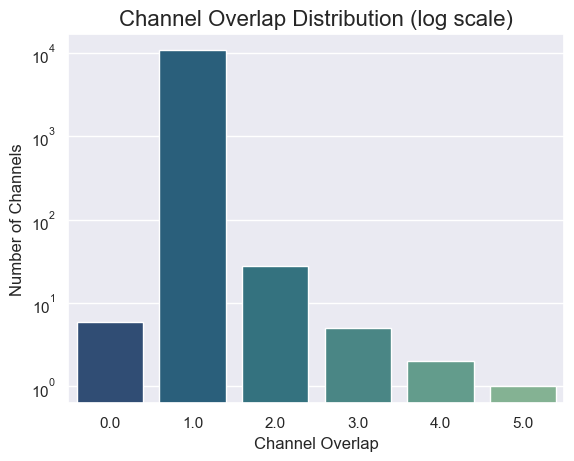

In [ ]:
ax = sns.countplot(x = 'ch_overlap', data = df_channels_eng, palette = palette)
ax.set_title("Channel Overlap Distribution (log scale)", fontsize = 16)
plt.ylabel("Number of Channels")
plt.xlabel("Channel Overlap")
plt.yscale('log')

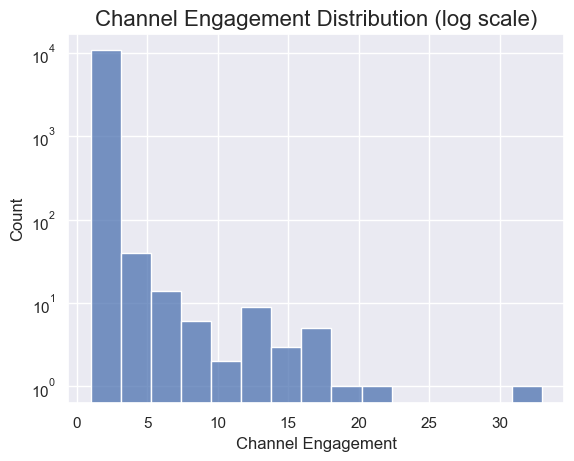

In [ ]:
sns.histplot(data = df_relations, x = 'ch_engagement')
plt.title("Channel Engagement Distribution (log scale)", fontsize = 16)
plt.xlabel("Channel Engagement")
plt.yscale('log')

In [ ]:

#sns.histplot(data = df_influencers, x = 'Average_views (thousands)', bins = 20)
#plt.yscale('log')

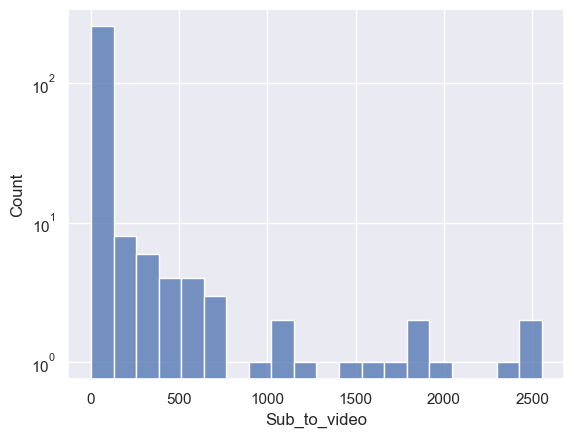

In [ ]:

sns.histplot(data = df_influencers, x = 'Sub_to_video', bins = 20)
plt.yscale('log')

In [ ]:
df_influencers.to_csv('influencers.csv')

In [ ]:
df_influencers['ch_subscriberCount'].min()

np.int64(1010)

In [ ]:
df_influencers

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video,ch_overlap
0,UCJi2qlOvtWIdL4di0HbSQKg,PG GAMER,JAI SHREE RAM,2023-08-06T11:41:59.296894Z,2200,1850,2,1100.000000,925.000000,0.0
1,UC6ldrdW-ZhckfhZK6z_slGA,Soyeb Gamerz,Every Dream come true with Hard work and dedic...,2023-11-05T05:54:34.777374Z,3164,1790,10,316.400000,179.000000,1.0
2,UCtBMemz4Vf3VPbWjCcBkr1w,No Competition Gaming,Welcome to No Competition - your ultimate gami...,2023-05-23T04:09:17.884459Z,92,1800,9,10.222222,200.000000,0.0
3,UCQioIeieitPSwIhCQcPVs9g,Rolling balls 1,NaN,2023-01-21T07:27:02.751154Z,705,1960,8,88.125000,245.000000,1.0
4,UCMJm3ovDASkuxasSkEf31aw,Gw Asjad,1 Subscribe 1 Help 🤗😊🤗\n\nWhat's Up Guys \n ...,2023-02-15T04:48:16.092725Z,43,1800,19,2.263158,94.736842,0.0
...,...,...,...,...,...,...,...,...,...,...
288,UCDVRFv9Ht_U9jTEjX31e2QQ,Quit-,"Quit: not really, new channel though!",2023-05-27T04:31:34.599645Z,128,1140,2,64.000000,570.000000,1.0
289,UCJ4ILSqKoCvfDmoDMJc4ZNg,Olistickman,10subs✅\n100subs✅\n1000subs❌\n10000subs❌\n1000...,2016-07-23T11:20:48Z,1112356,48800,27,41198.370370,1807.407407,1.0
290,UCVtPnTkzjSpUNDdm5KjBH7Q,gwapo,"professional streak hunter ‼️ \n\nhello, i’m g...",2024-06-26T23:44:25.121605Z,1654340,3900,53,31213.962264,73.584906,1.0
291,UCbv_-8a_m-0kcrndDVk30Yg,NøobJKvr,JMANCURLY IS GAY!!! BEST rapper Eminem is my fav,2023-04-21T22:22:07.055063Z,1186200,6380,433,2739.491917,14.734411,1.0


## NETWORK GRAPH

In [ ]:
min_videos = 10 # These parameters are arbitrary
min_subs = 10000

influencers = df_channels_all[(df_channels_all['ch_viewCount'] > min_videos) & (df_channels_all['ch_subscriberCount'] > min_subs)]['ch_id']

In [ ]:
df_relations_inf = df_relations[(df_relations['ch_id'].isin(influencers)) & (df_relations['commenter_id'].isin(influencers))]

In [ ]:
# Removing self-commenting
df_relations_inf = df_relations_inf[df_relations_inf['ch_id'] != df_relations_inf['commenter_id']]

In [ ]:
channel_list = list(set(df_relations_inf[['commenter_id', 'ch_id']].stack().to_list()))

In [ ]:
len(channel_list)

10

In [ ]:
# Mapping channel ids to a numeric value (makes graph easier)
id_ch_dct = {i:v for i,v in enumerate(channel_list)}
ch_id_dct = {v:i for i,v in enumerate(channel_list)}

In [ ]:
df_relations_inf['ch_num'] = df_relations_inf['ch_id'].map(ch_id_dct)
df_relations_inf['commenter_num'] = df_relations_inf['commenter_id'].map(ch_id_dct)

In [ ]:
# Creating a Network Graph

G2 = nx.from_pandas_edgelist(df_relations, source = 'commenter_id', target = 'ch_id', edge_attr = 'ch_engagement', create_using = nx.DiGraph)

In [ ]:
G = nx.from_pandas_edgelist(df_relations_inf, source = 'commenter_num', target = 'ch_num', edge_attr = 'ch_engagement', create_using = nx.DiGraph)

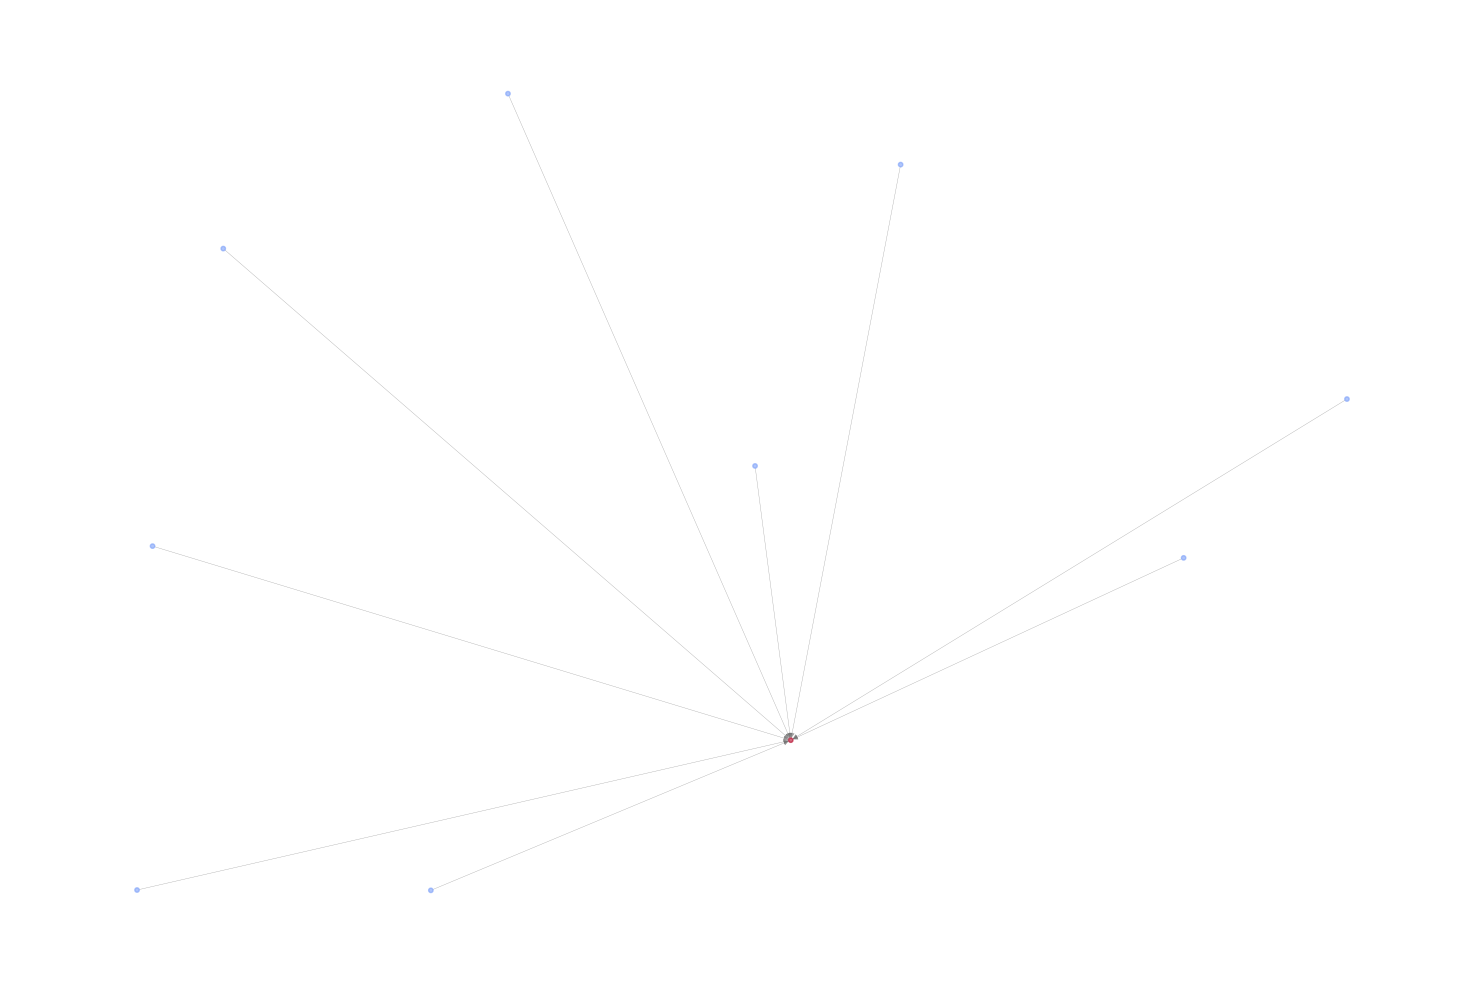

In [ ]:
# fixing the size of the figure
plt.figure(figsize =(15, 10))
  
node_color = [G.degree(v) for v in G]
# node colour is a list of degrees of nodes
  
#node_size = [0.0005 * nx.get_node_attributes(G, 'population')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.25 * G[u][v]['ch_engagement'] for u, v in G.edges()]
# width of edge is a list of weight of edges
  
nx.draw_networkx(G, 
                 alpha = 0.6, node_size = 10,
                 with_labels = False, width = edge_width,
                 arrowsize = 8, node_color = node_color,
                 edge_color ='0.4', cmap = plt.cm.coolwarm,
                 vmin = 0, vmax = 5,
                 pos = nx.spring_layout(G))
  
plt.axis('off')
plt.tight_layout();

In [ ]:
df_channels_inf = df_channels_all[df_channels_all['ch_id'].isin(channel_list)].reset_index(drop = True)

In [ ]:
df_channels_inf

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UCI-hra9nirfdOkmt0m-ww2Q,fatima 😋,"mm2, dti, catalog edits 🇵🇸 \nmy pfp is horribl...",2023-04-08T19:35:42.751941Z,3825039,13000,448
1,UCuHC9I2C70aLoW3-bDrwoZQ,Lirah._,A dachshund lover...♡\n Hi guys I'm Lirah! If ...,2024-03-21T22:30:35.207845Z,2452968,14800,22
2,UCNqOD_PB2oUtIGNxpCVQ9zA,nvmfroggie,😎🐸💚✨️💅 OPEN ME! 💅✨️💚🐸😎\n\n--------------------...,2023-11-25T09:37:06.399203Z,3991997,21100,300
3,UCqYaAqTAjGfV_dUm9rsa94A,CoRge,MM2 CONTENT CREATOR 🔪\n\ncorgebusiness1@gmail....,2020-01-18T01:11:35.34473Z,4965551,168000,303
4,UCyEIYAQ5fj0FjbpzJcUtcAw,Rayan playz,\n \n\n\nالاسم:ريان 🖤😉\n\n____________...,2024-08-23T10:15:43.746452Z,89178,26600,26
5,UCE9Ig_eMVG9etBin42Np-YQ,awhzemma,"☆ HAPPY 10K! Nov. 10th, 2024 ☆ \n\n☆ ur fav mu...",2024-07-06T14:36:44.154377Z,1216697,10300,163
6,UC6SnTw5Tr3b6IoJhwNsQdvg,Liliana,she/her - female\n17 / music artist / shorts c...,2019-08-02T08:42:12Z,2142306,60200,250
7,UCmwck16NSuaZEPJl4n8QJbg,mari,♡ pretty in pink\n\nhii i’m mari!! 🎀\n\nroblox...,2023-03-26T22:59:42.190397Z,3507678,15500,158
8,UCMO5JPRfP-AwI7kB0F8RAXw,GreenScreenSkull,King of green screens and comments,2024-01-14T04:40:27.602023Z,27924230,833000,326
9,UCNdWJOT8QOM15D7OPw7p-Uw,RandomMM2,MM2 creator and streamer\nGoal: to get 20k by ...,2021-03-19T16:15:47.519728Z,633512,17500,145


In [ ]:
df_channels_inf['ch_num'] = df_channels_inf['ch_id'].map(ch_id_dct)

In [ ]:
# We create a dict. to map channels with subscriber counts:

channels = df_channels_inf['ch_num']
subs = df_channels_inf['ch_subscriberCount']

sub_counts = {k:v for (k,v) in zip(channels, subs)}

In [ ]:
for i in list(G.nodes()):
    G.nodes[i]['sub_count'] = sub_counts[i]

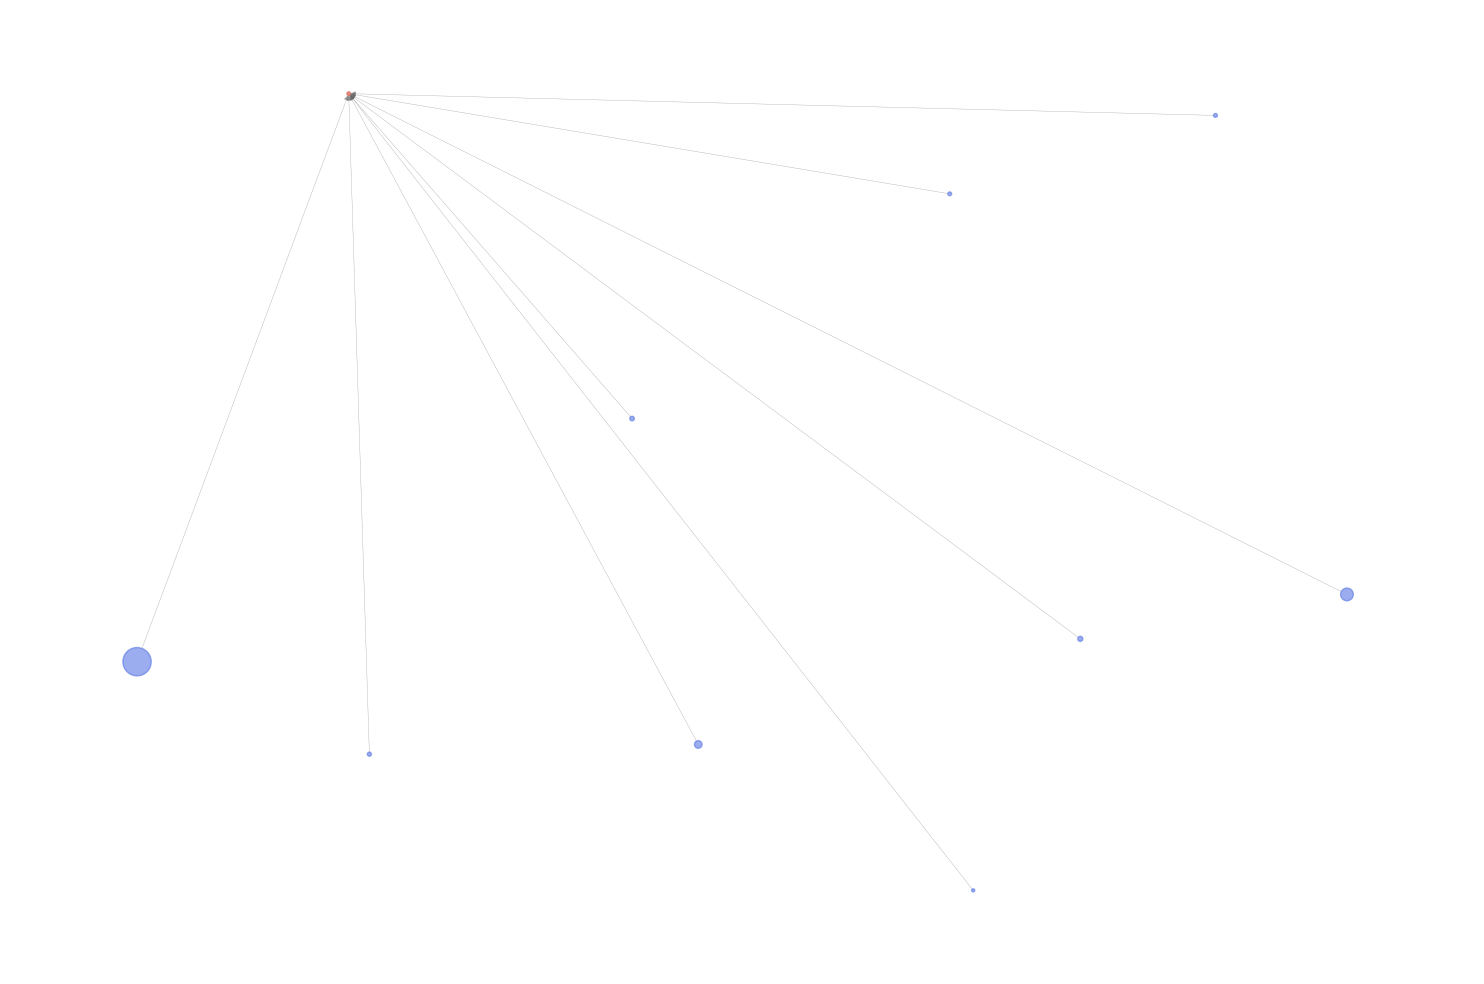

In [ ]:
# fixing the size of the figure
plt.figure(figsize =(15, 10))
  
node_color = [G.degree(v) for v in G]
# node colour is a list of degrees of nodes
  
node_size = [0.0005 * nx.get_node_attributes(G, 'sub_count')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.25 * G[u][v]['ch_engagement'] for u, v in G.edges()]
# width of edge is a list of weight of edges
  
nx.draw_networkx(G, 
                 alpha = 0.6, node_size = node_size, 
                 with_labels = False, width = edge_width,
                 arrowsize = 8, node_color = node_color,
                 edge_color ='0.4', cmap = plt.cm.coolwarm,
                 vmin = 0, vmax = 10,
                 pos = nx.spring_layout(G))
  
plt.axis('off')
plt.tight_layout();

In [ ]:
# Calculating Centrality (Degree & PageRank Algorithm):

deg = nx.degree(G2)
#print(deg)
pr=nx.pagerank(G2)
#print(pr)

In [ ]:
df_influencers=df_influencers-seeds
df_influencers['PR_score'] = df_influencers['ch_id'].map(pr)
df_influencers['degree'] = df_influencers['ch_id'].map(deg)
df_influencers['Average_views (thousands)'] = df_influencers['Average_views']/1000
df_influencers = df_influencers.drop(columns = ['Average_views'])

In [ ]:
# Obtaining the top 20 channels in terms of PageRank score:

df_influencers.sort_values('PR_score', ascending = False).head(20).to_csv('top20.csv')

In [ ]:
df_influencers.sort_values('PR_score', ascending = False).head(20)

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Sub_to_video,ch_overlap,PR_score,degree,Average_views (thousands)
5,UCfTQT8qhZqha7Qi34KP2YTg,Forever Lightning,Welcome!\n\nI hope to entertain some of you gu...,2023-11-16T10:36:55.474557Z,6310,1950,3,650.000000,5.0,0.248612,62,2.103333
20,UCNPS0DwodN0MXiQXQXmjjQw,RegularGamer,Tag me on a vid if u wanna join PLC,2022-09-27T20:52:30.967365Z,747518,2600,149,17.449664,2.0,0.160438,4145,5.016899
9,UCU14MoM3vjB7J_xEFqYf07Q,RxnEditt,memes of the day!,2023-07-26T22:32:32.451032Z,85415,1230,58,21.206897,3.0,0.104223,65,1.472672
10,UCI-hra9nirfdOkmt0m-ww2Q,fatima 😋,"mm2, dti, catalog edits 🇵🇸 \nmy pfp is horribl...",2023-04-08T19:35:42.751941Z,3825039,13000,448,29.017857,2.0,0.084436,4036,8.538033
16,UCM0sqxv4dnl6_4mIDFL6z6Q,LightningRay,😁PRESS HERE😁\n\nhey there !\n😃Lemme tell you a...,2023-07-27T20:59:17.929865Z,419311,2790,481,5.800416,3.0,0.083072,741,0.871748
12,UCVG5rpa1a1NKLjJJfrErzpg,☆ JeeyaXmillie ☆,(DO NOT EVEN TRY COPYING MY VIDEOS YOU WILL RE...,2023-06-13T16:05:24.573546Z,332666,1880,37,50.810811,2.0,0.081638,385,8.990973
17,UCREdmsnYVJMicXOtknKYESw,Roxie,i make MM2 content and roblox based edits. i h...,2023-02-18T16:02:38.368856Z,134786,1260,73,17.260274,4.0,0.041494,315,1.846384
1,UC6ldrdW-ZhckfhZK6z_slGA,Soyeb Gamerz,Every Dream come true with Hard work and dedic...,2023-11-05T05:54:34.777374Z,3164,1790,10,179.000000,1.0,0.017082,16,0.316400
19,UCZBTZKO65YQtmJP0g6A0iAQ,Noah,Dear YouTube users all accounts will be delete...,2023-07-10T16:22:54.780961Z,532552,1910,184,10.380435,2.0,0.008636,415,2.894304
8,UCyo8Jhuw4pU-g1alrCkPfyA,birajvloger593,Hello friend subscribe🐶\n\n\n>23 day-100 sub😘\...,2023-11-05T08:18:08.994713Z,1981,1910,7,272.857143,1.0,0.005973,40,0.283000


URL

In [ ]:
import pandas as pd
import math

In [ ]:
# Function to calculate channel score
def calculate_channel_score(stats, weights):
    subscribers_score = weights["subscribers"] * math.log(1 + stats["subscribers"])
    views_score = weights["total_views"] * math.log(1 + stats["total_views"])
    video_count_score = weights["video_count"] * math.log(1 + stats["video_count"])
    
    total_score = subscribers_score + views_score + video_count_score
    return total_score

# # List of channel IDs to rank
# seeds = ['UCgjhed4ZWlmC25hS4Sgs7gw',
#               'UC_eAIxEDrIZYVWWdKsg_sqQ',
#               'UCe76QcczhT2M82M-V1nEIUQ',
#               'UCRRfSRlDq2ma7xp_8HYvYeA',
#               'UC5Bnfg0KYC9cxlx8VlrlPuA',
#               'UC1gcUuLhyMCBkZSO-SeJVQg',
#               'UCg187VQ-GhEuZoAkiX8rfhw',
#               'UClBzs_otOTThoS-fIYr6woA',
#               'UCBPt0tyZbcOSiKQxOZKkbpg',
#               'UCsN4-ME2eHj6mpBgCcFwV-w']
              
# Weights for scoring
weights = {"subscribers": 0.5, "total_views": 0.3, "video_count": 0.2}

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_influencers = pd.read_csv("influencers.csv")

# Function to calculate the channel score
def calculate_channel_score(stats, weights):
    return sum(s * w for s, w in zip(stats, weights))  # Weighted sum calculation

# Define weights (example weights for each column)
weights = [1, 1, 1]  # have used 1 as weight to give equal weightage, can change if need be

# Fetch data and rank channels
ranked_channels = []
for _, row in df_influencers.iterrows():  # Iterate through rows in the DataFrame
    # Extract the stats for the current row
    stats = [row['ch_videoCount'], row['ch_subscriberCount'], row['ch_viewCount']]
    score = calculate_channel_score(stats, weights)  # Compute the score using weights
    ranked_channels.append({"id": row['ch_id'], "score": score})  # Append channel with its score

# Sort channels by score
ranked_channels.sort(key=lambda x: x["score"], reverse=True)  # Sort by score in descending order

# Print ranked channels
for channel in ranked_channels:
    print(channel)


{'id': 'UCQWsAbnIFxAP-jQQfM_oYBQ', 'score': 2402149593}
{'id': 'UCMO5JPRfP-AwI7kB0F8RAXw', 'score': 28757556}
{'id': 'UC71Qj5bHp70TctNEODNbXwQ', 'score': 17106453}
{'id': 'UCOMoTzagY8G_ad9e2HgzwgA', 'score': 10781898}
{'id': 'UCcsz9FbJ0U5w6oNmdY-10aw', 'score': 9687964}
{'id': 'UCZGVpXbxPwkv0LkvwiANdOA', 'score': 7330877}
{'id': 'UCHMyXCvKG4rSA1B1Wb5ccMA', 'score': 7316156}
{'id': 'UCrkJy2E_VuMmnF7oEu0IHag', 'score': 6166658}
{'id': 'UCKYm0ZIWex2yd5N0-EQujIw', 'score': 5804508}
{'id': 'UCqYaAqTAjGfV_dUm9rsa94A', 'score': 5133854}
{'id': 'UCayR035Q0gWmovvBykTZB0g', 'score': 4767761}
{'id': 'UC1fvM50Objmom3ol84JUfVA', 'score': 4743446}
{'id': 'UCNqOD_PB2oUtIGNxpCVQ9zA', 'score': 4013397}
{'id': 'UCI-hra9nirfdOkmt0m-ww2Q', 'score': 3838487}
{'id': 'UCmwck16NSuaZEPJl4n8QJbg', 'score': 3523336}
{'id': 'UCAoATHuWEA36NjSgMDLzrPA', 'score': 3061368}
{'id': 'UC2d0vFn-nqegwOQAF3mFTEg', 'score': 2969907}
{'id': 'UC5yX6FQxtheTBGxshha13vQ', 'score': 2785835}
{'id': 'UCvOot6ecPVFlgEA-ZKIjhAw', 'scor

In [ ]:
# Normalize scores between 0 and 1
def normalize_scores(ranked_channels):
    scores = [channel['score'] for channel in ranked_channels]
    min_score, max_score = min(scores), max(scores)
    
    for channel in ranked_channels:
        # Avoid division by zero if all scores are equal
        channel['normalized_score'] = (
            (channel['score'] - min_score) / (max_score - min_score)
            if max_score > min_score
            else 0
        )

In [ ]:
# Export results to a CSV file
def export_to_csv(ranked_channels, filename="data/ranked_channels.csv"):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["id", "score", "normalized_score"])
        writer.writeheader()
        for channel in ranked_channels:
            writer.writerow(channel)

In [ ]:
# Normalize scores after ranking
normalize_scores(ranked_channels)

In [ ]:
import csv
export_to_csv(ranked_channels)

In [ ]:
# Display results with normalized scores
for rank, channel in enumerate(ranked_channels, start=1):
    print(
        f"Rank {rank}: Channel ID {channel['id']} "
        f"with Score: {channel['score']} "
        f"and Normalized Score: {channel['normalized_score']:.2f}"
    )

Rank 1: Channel ID UCQWsAbnIFxAP-jQQfM_oYBQ with Score: 2402149593 and Normalized Score: 1.00
Rank 2: Channel ID UCMO5JPRfP-AwI7kB0F8RAXw with Score: 28757556 and Normalized Score: 0.01
Rank 3: Channel ID UC71Qj5bHp70TctNEODNbXwQ with Score: 17106453 and Normalized Score: 0.01
Rank 4: Channel ID UCOMoTzagY8G_ad9e2HgzwgA with Score: 10781898 and Normalized Score: 0.00
Rank 5: Channel ID UCcsz9FbJ0U5w6oNmdY-10aw with Score: 9687964 and Normalized Score: 0.00
Rank 6: Channel ID UCZGVpXbxPwkv0LkvwiANdOA with Score: 7330877 and Normalized Score: 0.00
Rank 7: Channel ID UCHMyXCvKG4rSA1B1Wb5ccMA with Score: 7316156 and Normalized Score: 0.00
Rank 8: Channel ID UCrkJy2E_VuMmnF7oEu0IHag with Score: 6166658 and Normalized Score: 0.00
Rank 9: Channel ID UCKYm0ZIWex2yd5N0-EQujIw with Score: 5804508 and Normalized Score: 0.00
Rank 10: Channel ID UCqYaAqTAjGfV_dUm9rsa94A with Score: 5133854 and Normalized Score: 0.00
Rank 11: Channel ID UCayR035Q0gWmovvBykTZB0g with Score: 4767761 and Normalized Sco

In [ ]:
# Function to calculate channel score
#def calculate_channel_score(stats, weights):
    #subscribers_score = weights["subscribers"] * math.log(1 + stats["subscribers"])
    #views_score = weights["total_views"] * math.log(1 + stats["total_views"])
    #video_count_score = weights["video_count"] * math.log(1 + stats["video_count"])
    
    #total_score = subscribers_score + views_score + video_count_score
    #return total_score

# # List of channel IDs to rankA
# seeds = ['UCgjhed4ZWlmC25hS4Sgs7gw',
#               'UC_eAIxEDrIZYVWWdKsg_sqQ',
#               'UCe76QcczhT2M82M-V1nEIUQ',
#               'UCRRfSRlDq2ma7xp_8HYvYeA',
#               'UC5Bnfg0KYC9cxlx8VlrlPuA',
#               'UC1gcUuLhyMCBkZSO-SeJVQg',
#               'UCg187VQ-GhEuZoAkiX8rfhw',
#               'UClBzs_otOTThoS-fIYr6woA',
#               'UCBPt0tyZbcOSiKQxOZKkbpg',
#               'UCsN4-ME2eHj6mpBgCcFwV-w']
              
# Weights for scoring
#weights = {"subscribers": 0.5, "total_views": 0.3, "video_count": 0.2}

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
#df_influencers = pd.read_csv("influencers.csv")

# Fetch data and rank channels
#ranked_channels = []
#or _, row in df_influencers.iterrows():
    # Example: Sum up the values directly without weights
 #   score = row['ch_videoCount'] + row['ch_subscriberCount'] + row['ch_viewCount']
  #  ranked_channels.append({"id": row['ch_id'], "score": score})

# Sort channels by score
#ranked_channels.sort(key=lambda x: x["score"], reverse=True)

# Print ranked channels
#for channel in ranked_channels:
 #   print(channel)


In [ ]:
# Fetch data and rank channels
#ranked_channels = []
#for infl in influencers:
 #   stats = influencers[['ch_videoCount', 'ch_subscriberCount', 'ch_viewCount']].values.tolist()
  # ranked_channels.append({"id": ch_id, "score": score})

# Sort channels by score
##ranked_channels.sort(key=lambda x: x["score"], reverse=True)

In [ ]:
'''import pandas as pd

# Load the CSV file into a DataFrame
df_influencers = pd.read_csv("influencers.csv")

# Fetch data and rank channels
ranked_channels = []
for _, row in df_influencers.iterrows():
    # Example: Sum up the values directly without weights
    score = row['ch_videoCount'] + row['ch_subscriberCount'] + row['ch_viewCount']
    ranked_channels.append({"id": row['ch_id'], "score": score})

# Sort channels by score
ranked_channels.sort(key=lambda x: x["score"], reverse=True)

# Print ranked channels
for channel in ranked_channels:
    print(channel)'''


In [ ]:
# Normalize scores between 0 and 1
'''def normalize_scores(ranked_channels):
    scores = [channel['score'] for channel in ranked_channels]
    min_score, max_score = min(scores), max(scores)
    
    for channel in ranked_channels:
        # Avoid division by zero if all scores are equal
        channel['normalized_score'] = (
            (channel['score'] - min_score) / (max_score - min_score)
            if max_score > min_score
            else 0
        )'''

In [ ]:
# Export results to a CSV file
'''def export_to_csv(ranked_channels, filename="ranked_channels.csv"):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["id", "score", "normalized_score"])
        writer.writeheader()
        for channel in ranked_channels:
            writer.writerow(channel)'''

In [ ]:
# Normalize scores after ranking
'''normalize_scores(ranked_channels)'''

In [ ]:
# Export results
'''export_to_csv(ranked_channels)'''

In [ ]:
# Display results with normalized scores
'''for rank, channel in enumerate(ranked_channels, start=1):
    print(
        f"Rank {rank}: Channel ID {channel['id']} "
        f"with Score: {channel['score']} "
        f"and Normalized Score: {channel['normalized_score']:.2f}"
    )'''

## Clustering (Exploratory)

In [ ]:
# K-means: Based on edges only:

edges = list(G.edges())
node_labels = list(G.nodes())
num_nodes = G.number_of_nodes()

edge_matrix = np.zeros((num_nodes, num_nodes))

for edge in edges:
    source = edge[0]
    target = edge[1]
    edge_matrix[source][target] = 1

In [ ]:
edge_matrix

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
k_clusters = 5
model = cluster.KMeans(n_clusters=k_clusters, n_init=200)
model.fit(edge_matrix)

c:\Users\Svea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=5, n_init=200)

In [ ]:
def draw_communities(G, communities, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    communities : list
        A list where the position is the channel and the value at the position is the channel's community.
        E.g. `print(community[8]) --> 1` means that channel #8 is a part of community 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    community_dict = defaultdict(list)
    for channel, community in enumerate(communities):
        community_dict[community].append(channel)
    
    # Normalize number of clubs for choosing a color
    norm = cm.colors.Normalize(vmin=0, vmax=len(community_dict.keys()))
    
    for community, channels in community_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=channels,
                               node_color=cm.jet(norm(community)),
                               node_size=100,
                               alpha=0.6,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("eSports Youtube Communities")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [ ]:
pos = nx.spring_layout(G)

In [ ]:
community_dict = defaultdict(list)
for channel, community in enumerate(model.labels_):
    community_dict[community].append(channel)

c:\Users\Svea\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


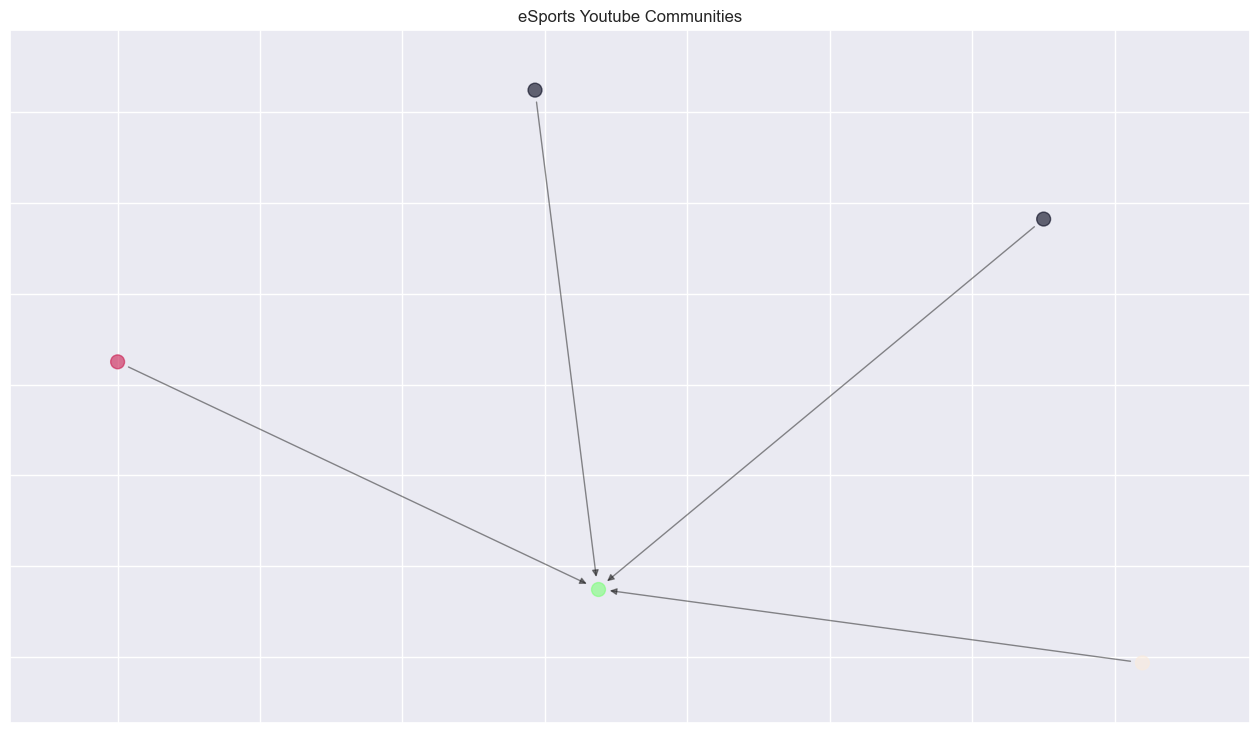

In [ ]:
draw_communities(G, model.labels_, pos)